#Importing Dependancies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loding Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HousePricePrediction.xlsx')

#Cleaning

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df.shape

(2919, 13)

In [ ]:
df.drop(['Id'],
			axis=1,
			inplace=True)


In [ ]:
new_dataset = df.dropna()


In [ ]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

#Checking Outliers

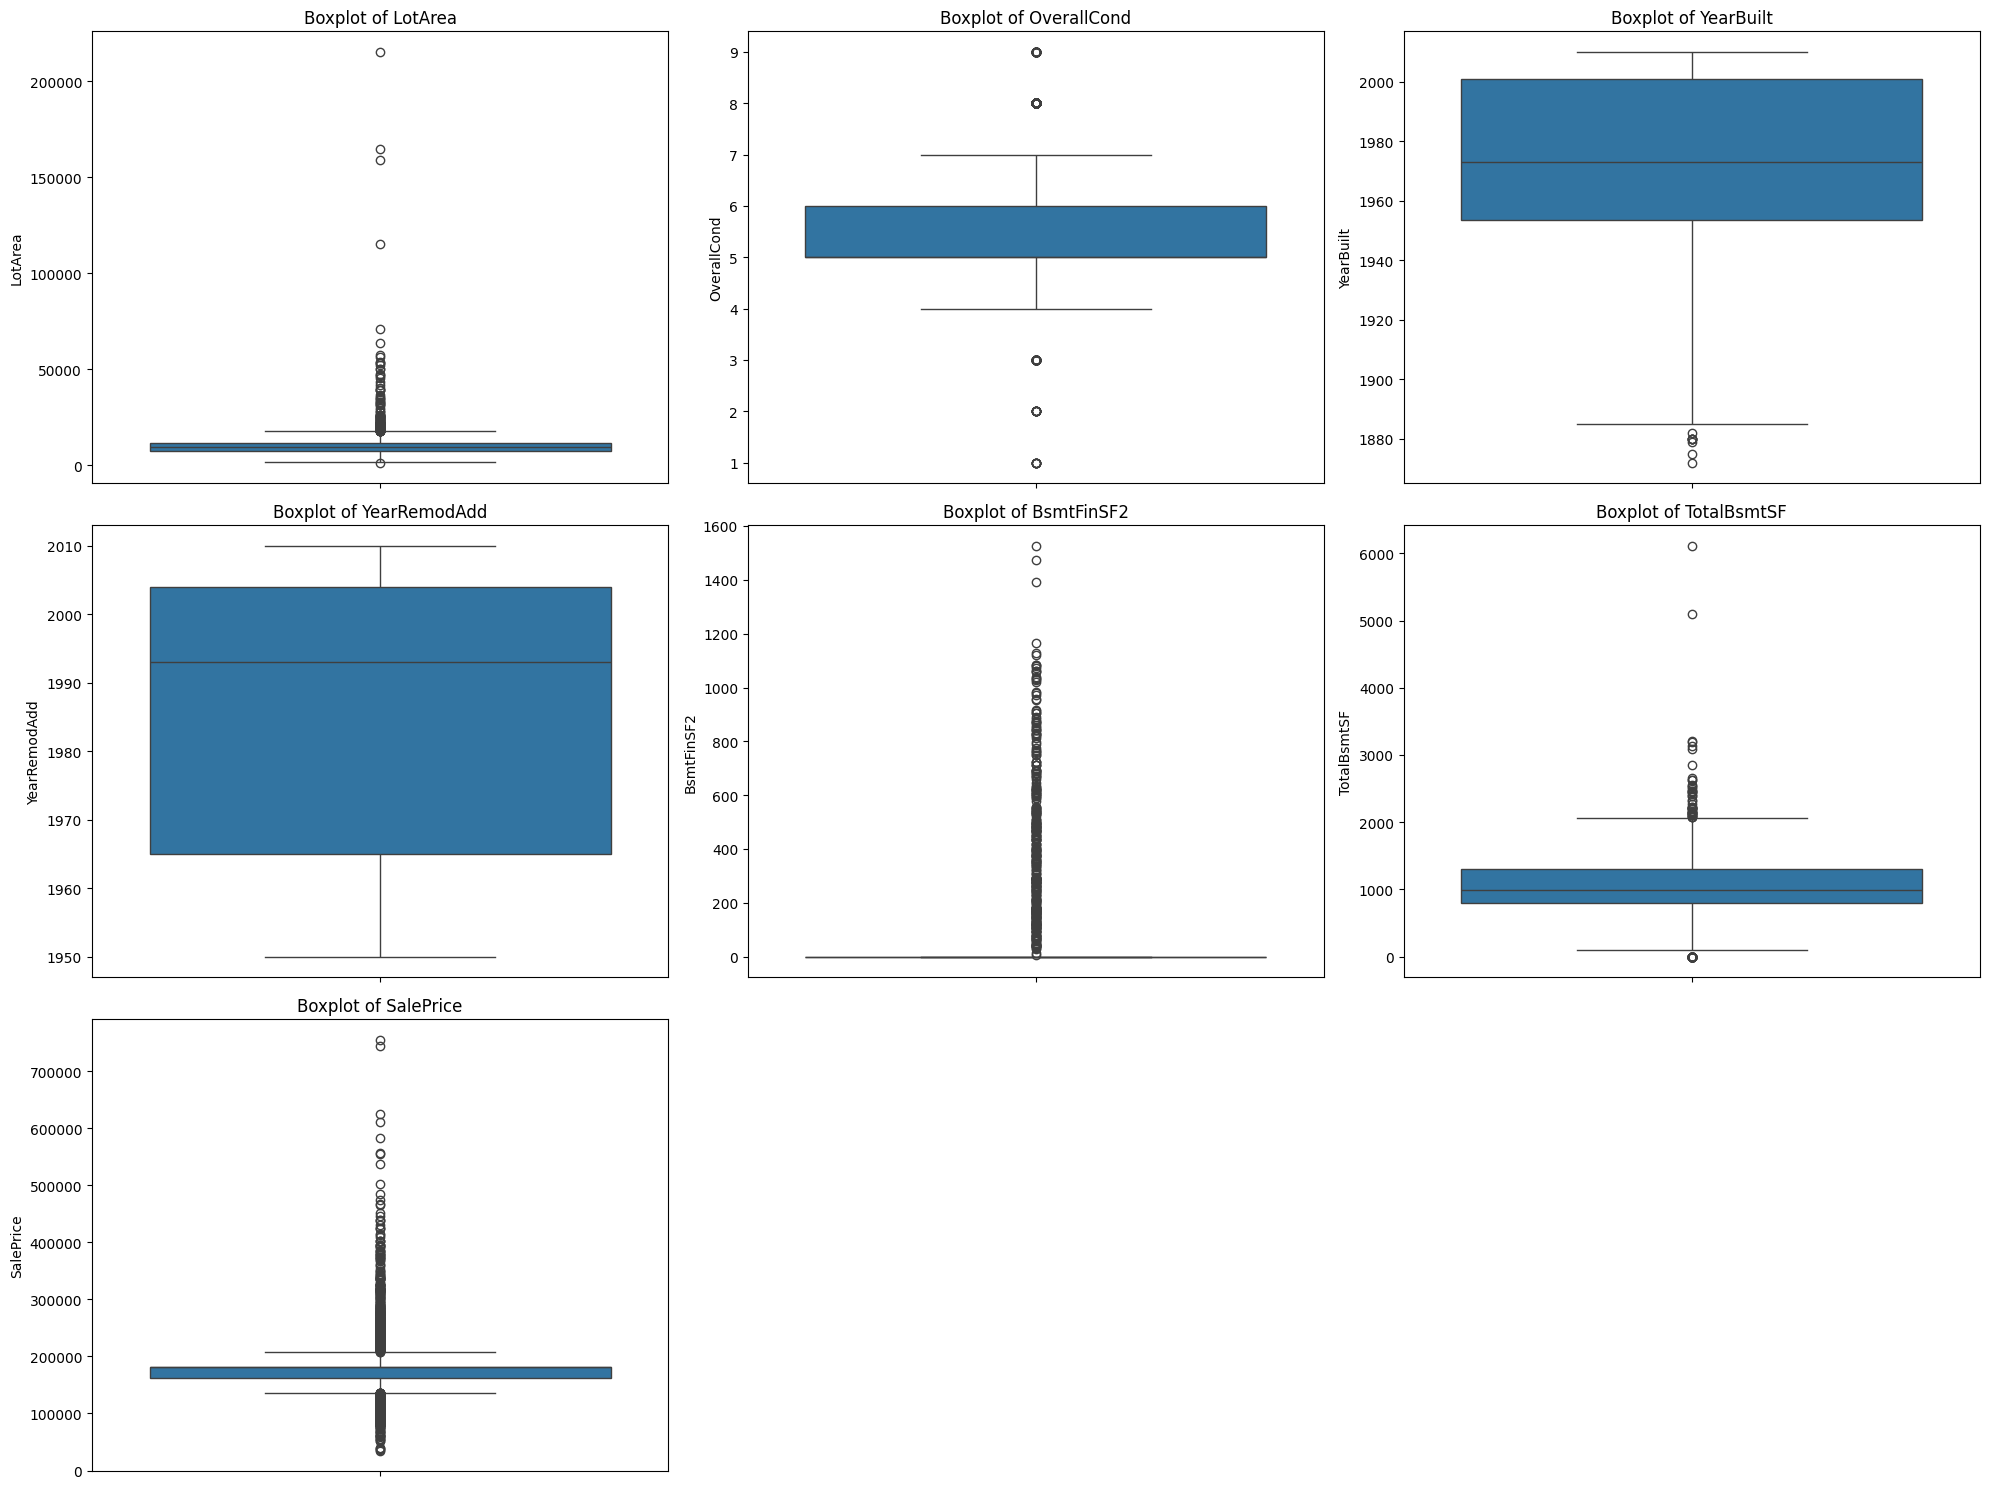

In [ ]:
# List of numerical features
numerical_features = ['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']

# Create boxplots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
df['SalePrice'] = df['SalePrice'].fillna(
df['SalePrice'].mean())


In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [ ]:
numerical_features= pd.DataFrame(numerical_features)

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


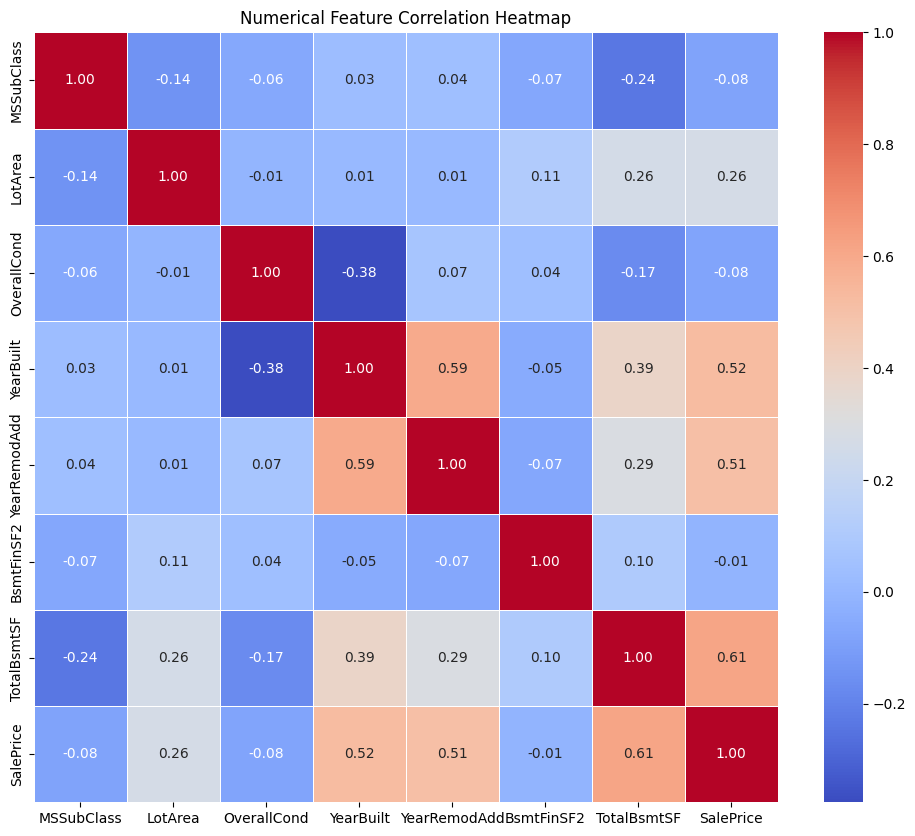

In [ ]:
# Select only numerical features
numerical_features = new_dataset.select_dtypes(include=['number'])

# Display the first few rows of the numerical features
print(numerical_features.head())

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title for the heatmap
plt.title('Numerical Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.3009689871130911


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.13678887799473877

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.2064918635154822


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

y_pred = model.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2064918635154822


In [ ]:
results = pd.DataFrame({'Actual': Y_valid, 'Predicted': y_pred})

# Save the results DataFrame to a CSV file
results.to_csv('predicted_values.csv', index=False)

In [ ]:
results

,Actual,Predicted
529,200624.0,170000.0
491,133000.0,109000.0
459,110000.0,82000.0
279,192000.0,171500.0
655,88000.0,85400.0
...,...,...
326,324000.0,260400.0
440,555000.0,440000.0
1387,136000.0,139400.0
1323,82500.0,37900.0


In [ ]:
# Get feature importances
feature_importance = model.feature_importances_

# Print feature importances
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importance[i]}')

MSSubClass: 0.05183594804019995
LotArea: 0.17370084267950017
OverallCond: 0.041004144325865674
YearBuilt: 0.3642470085525147
YearRemodAdd: 0.046220415794929054
BsmtFinSF2: 0.0024867921606661595
TotalBsmtSF: 0.28246266381990076
MSZoning_C (all): 0.0026925751261705636
MSZoning_FV: 0.0005324694843730478
MSZoning_RH: 2.9030367554335202e-05
MSZoning_RL: 0.0008954344132045053
MSZoning_RM: 0.001335316303989492
LotConfig_Corner: 0.002834192129898803
LotConfig_CulDSac: 0.0002491819366194505
LotConfig_FR2: 0.000622974211173316
LotConfig_FR3: 0.0
LotConfig_Inside: 0.0013383005324407481
BldgType_1Fam: 0.00011139622807943665
BldgType_2fmCon: 4.622786152110301e-05
BldgType_Duplex: 0.002088887673991047
BldgType_Twnhs: 2.8716763595682002e-09
BldgType_TwnhsE: 7.73410726958241e-05
Exterior1st_AsbShng: 8.570251847885243e-06
Exterior1st_AsphShn: 8.13789193598582e-06
Exterior1st_BrkComm: 0.0
Exterior1st_BrkFace: 0.0141998127378598
Exterior1st_CBlock: 0.0
Exterior1st_CemntBd: 0.0016362463443041727
Exterior1